In [ ]:
import sys
import os

sys.path.append(os.path.abspath(".."))

from fractal_functions import *

# Random Graphs

In [ ]:
def to_latex_label(label: str) -> str:
    """
    Converts an edge label like 'r010' to LaTeX '$r_{010}$'.
    Leaves labels like '$\\tilde{r}_{i}$' unchanged.
    """
    # Check if label is already LaTeX for the tilde edges
    if label.startswith('$\\tilde{r}_{') and label.endswith('}$'):
        return label  # already LaTeX, return as-is

    # Otherwise assume standard form 'r...' and convert
    if label.startswith('r'):
        index = label[1:]  # get the part after 'r'
        return f"$r_{{{index}}}$"
    
    # Fallback: if it's not recognized, just return as a string
    return label


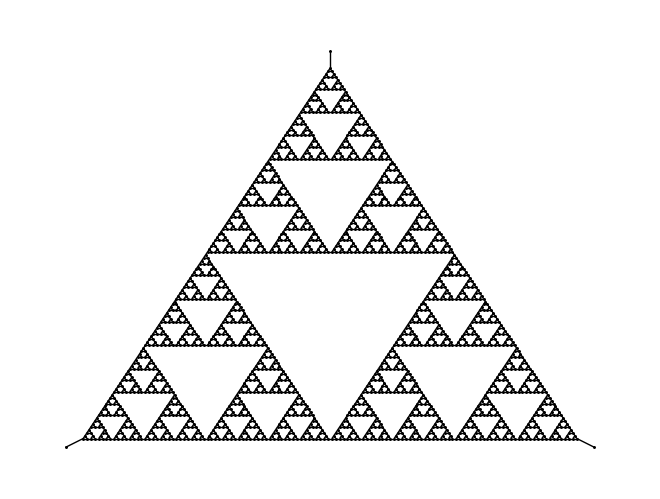

In [ ]:
n = 7
hn = hanoi_t(n)

plt.figure()

# Use the .pos attribute stored in the graph object
pos = get_pos(hn)
# edge_labels = nx.get_edge_attributes(hn, 'label')

edge_labels = {(u, v): to_latex_label(d['label']) for u, v, d in hn.edges(data=True)}

nx.draw(hn, pos,
        with_labels=False,
        node_size=1.25,
        node_color='black',
        font_size=8)

# nx.draw_networkx_edge_labels(hn, pos,
#                              edge_labels=edge_labels,
#                              font_color='blue',
#                              font_size=10)

# plt.title(f'Hanoi Graph with Tail Vertices, n={n}', size=20)
plt.show()

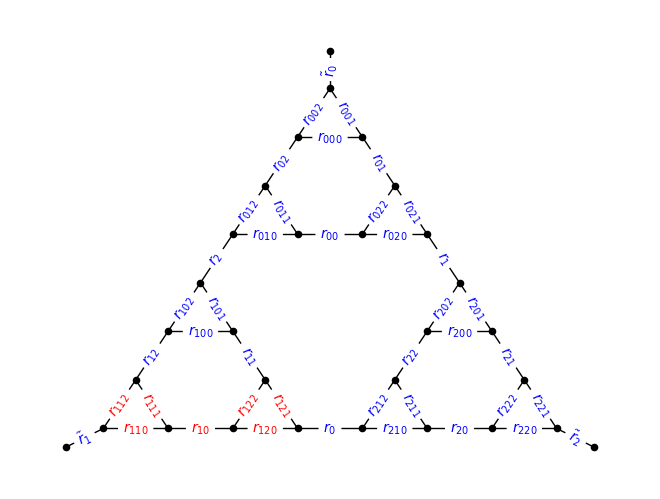

In [ ]:
n = 3
hn = hanoi_t(n)

black_labels = {}
red_labels = {}

red_list = ['r10', 'r110', 'r111', 'r112', 'r120', 'r121', 'r122']

for u, v, d in hn.edges(data=True):
    edge = (u, v)
    if d['label'] in red_list:
        # This label goes in the 'red' dictionary
        red_labels[edge] = to_latex_label(d['label'])
    else:
        # All other labels go in the 'black' dictionary
        black_labels[edge] = to_latex_label(d['label'])

# 2. Draw the base graph with all edges in black.
pos = get_pos(hn)
nx.draw(hn, pos,
        with_labels=False,
        node_size=20,
        node_color='black',
        edge_color='black',
        width=1)


# First, draw the black labels
nx.draw_networkx_edge_labels(hn, pos,
                             edge_labels=black_labels,
                             font_color='blue',
                             font_size = 10)

# Second, draw the red label
nx.draw_networkx_edge_labels(hn, pos,
                             edge_labels=red_labels,
                             font_color='red',
                             font_size = 10)


# plt.savefig('/home/tywick/OneDrive/UConn/Coding/Sage_Notebooks/newplots/vphi_h3.png', dpi = 300, bbox_inches='tight')

plt.show()

In [ ]:
# --- Main Logic for H_3 ---
n = 3
hn = hanoi_t(n)

# Separate labels into dictionaries based on desired color
blue_labels = {}
red_labels = {}
red_list = ['r10', 'r110', 'r111', 'r112', 'r120', 'r121', 'r122']

for u, v, d in hn.edges(data=True):
    edge = (u, v)
    label_text = to_latex_label(d['label'])
    
    if d['label'] in red_list:
        red_labels[edge] = label_text
    else:
        blue_labels[edge] = label_text

pos = get_pos(hn)

# --- Generate the TikZ Code ---
print("%% ============== TIKZ CODE FOR H_3 START ============== %%")
print("\\begin{tikzpicture}[node_style/.style={circle, fill=black, inner sep=1.2pt}, scale=1.5]")

print("\n% --- Node Declarations ---")
for node, (x, y) in pos.items():
    s_name = sanitize_node_name(node)
    print(f"\\node[node_style] ({s_name}) at ({x:.4f}, {y:.4f}) {{}};")

print("\n% --- Edge and Label Drawing ---")
for color, label_dict in [('blue', blue_labels), ('red', red_labels)]:
    for edge, label in label_dict.items():
        s_u = sanitize_node_name(edge[0])
        s_v = sanitize_node_name(edge[1])
        print(f"\\draw ({s_u}) -- ({s_v}) node[midway, sloped, fill=white, inner sep=0.5pt, font=\\tiny, text={color}] {{{label}}};")

print("\\end{tikzpicture}")

%% ============== TIKZ CODE FOR H_3 START ============== %%
\begin{tikzpicture}[node_style/.style={circle, fill=black, inner sep=1.2pt}, scale=1.5]

% --- Node Declarations ---
\node[node_style] (v0_0_0) at (0.5000, 0.7939) {};
\node[node_style] (v0_0_1) at (0.4375, 0.6856) {};
\node[node_style] (v0_0_2) at (0.5625, 0.6856) {};
\node[node_style] (v0_1_0) at (0.3750, 0.5774) {};
\node[node_style] (v0_1_1) at (0.3125, 0.4691) {};
\node[node_style] (v0_1_2) at (0.4375, 0.4691) {};
\node[node_style] (v0_2_0) at (0.6250, 0.5774) {};
\node[node_style] (v0_2_1) at (0.5625, 0.4691) {};
\node[node_style] (v0_2_2) at (0.6875, 0.4691) {};
\node[node_style] (v1_0_0) at (0.2500, 0.3608) {};
\node[node_style] (v1_0_1) at (0.1875, 0.2526) {};
\node[node_style] (v1_0_2) at (0.3125, 0.2526) {};
\node[node_style] (v1_1_0) at (0.1250, 0.1443) {};
\node[node_style] (v1_1_1) at (0.0625, 0.0361) {};
\node[node_style] (v1_1_2) at (0.1875, 0.0361) {};
\node[node_style] (v1_2_0) at (0.3750, 0.1443) {};
\node[n

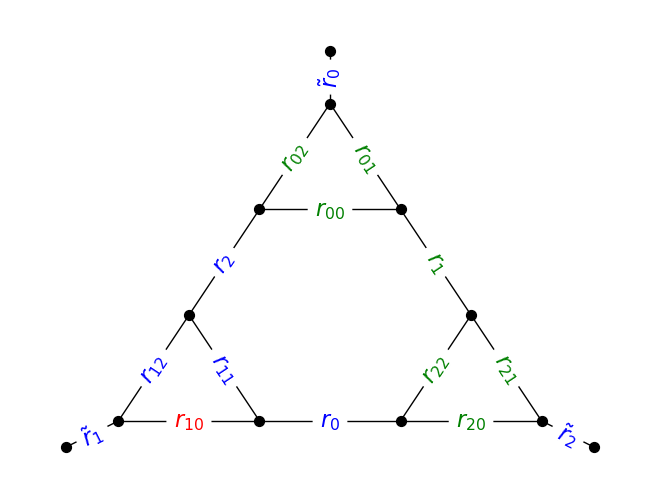

In [ ]:
# 1. Separate the labels into two dictionaries based on desired color.
n = 2
hn = hanoi_t(n)

blue_labels = {}
red_labels = {}
green_labels = {}

green_list = ['r1', 'r00', 'r01', 'r02', 'r22', 'r21', 'r20']

for u, v, d in hn.edges(data=True):
    edge = (u, v)
    if d['label'] == 'r10':
        # This label goes in the 'red' dictionary
        red_labels[edge] = r"$r_{10}$"

    if d['label'] in green_list:
        green_labels[edge] = to_latex_label(d['label'])
    else:
        # All other labels go in the 'black' dictionary
        blue_labels[edge] = to_latex_label(d['label'])

# 2. Draw the base graph with all edges in black.
pos = get_pos(hn)
nx.draw(hn, pos,
        with_labels=False,
        node_size=50,
        node_color='black',
        edge_color='black',
        width=1)


# First, draw the black labels
nx.draw_networkx_edge_labels(hn, pos,
                             edge_labels=blue_labels,
                             font_color='blue',
                             font_size = 16)

# Second, draw the red label
nx.draw_networkx_edge_labels(hn, pos,
                             edge_labels=red_labels,
                             font_color='red',
                             font_size = 16)

# Third, draw the green label
nx.draw_networkx_edge_labels(hn, pos,
                             edge_labels=green_labels,
                             font_color='green',
                             font_size = 16)

# plt.savefig('/home/tywick/OneDrive/UConn/Coding/Sage_Notebooks/newplots/vphi_h2_tikz.png', dpi = 300, bbox_inches='tight')


plt.show()

In [ ]:
def sanitize_node_name(name):
    """Converts a Python node name into a valid TikZ string."""
    if isinstance(name, str):
        return name
    # It's a tuple like (0, 1) -> v0_1
    return 'v' + '_'.join(map(str, name))

# --- Main Logic ---
n = 2
hn = hanoi_t(n)

# Separate labels into dictionaries based on desired color
blue_labels = {}
red_labels = {}
green_labels = {}
green_list = ['r1', 'r00', 'r01', 'r02', 'r22', 'r21', 'r20'] # Note: H2 has no r1 or r00

for u, v, d in hn.edges(data=True):
    edge = (u, v)
    label_text = to_latex_label(d['label'])
    
    if d['label'] == 'r10':
        red_labels[edge] = label_text
    elif d['label'] in green_list:
        green_labels[edge] = label_text
    else:
        blue_labels[edge] = label_text

pos = get_pos(hn)

# --- Generate the TikZ Code ---
print("%% ============== TIKZ CODE FOR H_2 START ============== %%")
print("\\begin{tikzpicture}[node_style/.style={circle, fill=black, inner sep=1.5pt}, scale=3]")

print("\n% --- Node Declarations ---")
for node, (x, y) in pos.items():
    s_name = sanitize_node_name(node)
    print(f"\\node[node_style] ({s_name}) at ({x:.4f}, {y:.4f}) {{}};")

print("\n% --- Edge and Label Drawing ---")
for color, label_dict in [('blue', blue_labels), ('red', red_labels), ('green', green_labels)]:
    for edge, label in label_dict.items():
        s_u = sanitize_node_name(edge[0])
        s_v = sanitize_node_name(edge[1])
        # Use 'sloped' to make labels align with edges
        print(f"\\draw ({s_u}) -- ({s_v}) node[midway, sloped, fill=white, inner sep=1pt, font=\\small, text={color}] {{{label}}};")

print("\\end{tikzpicture}")
print("%% ============== TIKZ CODE FOR H_2 END ============== %%")

%% ============== TIKZ CODE FOR H_2 START ============== %%
\begin{tikzpicture}[node_style/.style={circle, fill=black, inner sep=1.5pt}, scale=3]

% --- Node Declarations ---
\node[node_style] (v0_0) at (0.5000, 0.7217) {};
\node[node_style] (v0_1) at (0.3750, 0.5052) {};
\node[node_style] (v0_2) at (0.6250, 0.5052) {};
\node[node_style] (v1_0) at (0.2500, 0.2887) {};
\node[node_style] (v1_1) at (0.1250, 0.0722) {};
\node[node_style] (v1_2) at (0.3750, 0.0722) {};
\node[node_style] (v2_0) at (0.7500, 0.2887) {};
\node[node_style] (v2_1) at (0.6250, 0.0722) {};
\node[node_style] (v2_2) at (0.8750, 0.0722) {};
\node[node_style] (tail_0) at (0.5000, 0.8299) {};
\node[node_style] (tail_1) at (0.0312, 0.0180) {};
\node[node_style] (tail_2) at (0.9688, 0.0180) {};

% --- Edge and Label Drawing ---
\draw (v0_0) -- (tail_0) node[midway, sloped, fill=white, inner sep=1pt, font=\small, text=blue] {$\tilde{r}_{0}$};
\draw (v0_1) -- (v1_0) node[midway, sloped, fill=white, inner sep=1pt, font=\smal

In [ ]:
import networkx as nx

# def to_latex_label(label_str):
#     if 'tilde' in label_str:
#         parts = label_str.split('_')
#         return rf'$\tilde{{r}}_{{{parts[-1]}}}$'
#     else:
#         return f'$r_{{{label_str[1:]}}}$'

# def get_pos(G):
#     # This specific layout mimics the desired triangular shape
#     pos = {
#         "c0": (0.5, 0.866), "c1": (0, 0), "c2": (1, 0),
#         "t0": (0.5, 1.1), "t1": (-0.2, -0.1), "t2": (1.2, -0.1)
#     }
#     return pos

# # --- Main Logic ---

n = 1
hn = hanoi_t(n)

# Define which labels get which color, exactly as in your image
# Note: The green_list is empty for H_1 based on your image
blue_labels = {}
green_labels = {} 
red_labels = {} # Empty for this graph, but kept for consistency

# Green labels from your H_2 graph
green_list_h2 = ['r1', 'r00', 'r01', 'r02', 'r22', 'r21', 'r20']

for u, v, d in hn.edges(data=True):
    edge = (u, v)
    label_text = to_latex_label(d['label'])
    
    if d['label'] in green_list_h2:
        green_labels[edge] = label_text
    else:
        blue_labels[edge] = label_text

# Get the node positions
pos = get_pos(hn)

# --- Generate the TikZ Code ---

print("%% ============== TIKZ CODE START ============== %%")
print("\\begin{tikzpicture}[node_style/.style={circle, fill=black, inner sep=1.5pt}]")

# 1. Print node declarations
print("\n% --- Node Declarations ---")
for node_name, (x, y) in pos.items():
    print(f"\\node[node_style] ({node_name}) at ({x*2.5:.4f}, {y*2.5:.4f}) {{}};")

# 2. Print edge and label drawing commands
print("\n% --- Edge and Label Drawing ---")
for edge, label in blue_labels.items():
    u, v = edge
    print(f"\\draw ({u}) -- ({v}) node[midway, fill=white, inner sep=1pt, font=\\small, text=blue] {{{label}}};")
    
for edge, label in green_labels.items():
    u, v = edge
    print(f"\\draw ({u}) -- ({v}) node[midway, fill=white, inner sep=1pt, font=\\small, text=green] {{{label}}};")

# Add red labels here if any
# for edge, label in red_labels.items():
#     ...

print("\\end{tikzpicture}")
print("%% ============== TIKZ CODE END ============== %%")

%% ============== TIKZ CODE START ============== %%
\begin{tikzpicture}[node_style/.style={circle, fill=black, inner sep=1.5pt}]

% --- Node Declarations ---
\node[node_style] ((0,)) at (1.2500, 1.4434) {};
\node[node_style] ((1,)) at (0.6250, 0.3608) {};
\node[node_style] ((2,)) at (1.8750, 0.3608) {};
\node[node_style] (tail_0) at (1.2500, 1.8042) {};
\node[node_style] (tail_1) at (0.3125, 0.1804) {};
\node[node_style] (tail_2) at (2.1875, 0.1804) {};

% --- Edge and Label Drawing ---
\draw ((0,)) -- ((1,)) node[midway, fill=white, inner sep=1pt, font=\small, text=blue] {$r_{2}$};
\draw ((0,)) -- (tail_0) node[midway, fill=white, inner sep=1pt, font=\small, text=blue] {$\tilde{r}_{{0}$}$};
\draw ((1,)) -- ((2,)) node[midway, fill=white, inner sep=1pt, font=\small, text=blue] {$r_{0}$};
\draw ((1,)) -- (tail_1) node[midway, fill=white, inner sep=1pt, font=\small, text=blue] {$\tilde{r}_{{1}$}$};
\draw ((2,)) -- (tail_2) node[midway, fill=white, inner sep=1pt, font=\small, text=blue] {

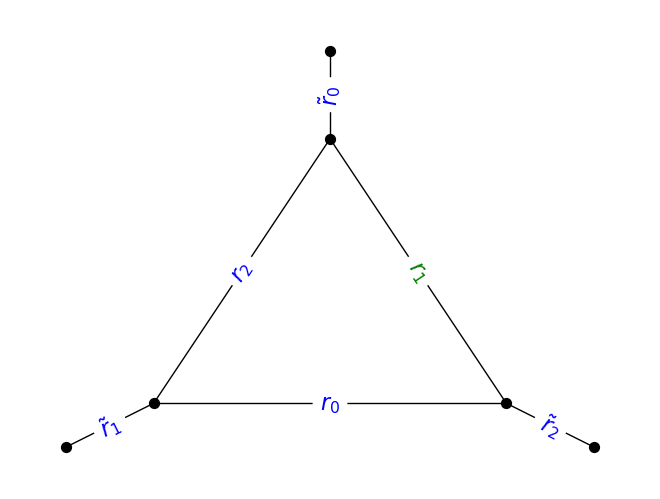

'\\documentclass{report}\n\\usepackage{tikz}\n\\usepackage{subcaption}\n\n\\begin{document}\n\\begin{figure}\n  \\begin{tikzpicture}\n      \\draw\n        (0.0:2) node ((0,)){(0,)}\n        (60.0:2) node ((1,)){(1,)}\n        (120.0:2) node ((2,)){(2,)}\n        (180.0:2) node (tail_0){tail_0}\n        (240.0:2) node (tail_1){tail_1}\n        (300.0:2) node (tail_2){tail_2};\n      \\begin{scope}[-]\n        \\draw ((0,)) to ((2,));\n        \\draw ((0,)) to ((1,));\n        \\draw ((0,)) to (tail_0);\n        \\draw ((1,)) to ((2,));\n        \\draw ((1,)) to (tail_1);\n        \\draw ((2,)) to (tail_2);\n      \\end{scope}\n    \\end{tikzpicture}\n\\end{figure}\n\\end{document}'

In [ ]:
# 1. Separate the labels into two dictionaries based on desired color.
n = 1
hn = hanoi_t(n)

blue_labels = {}
red_labels = {}
green_labels = {}

green_list = ['r1', 'r00', 'r01', 'r02', 'r22', 'r21', 'r20']

for u, v, d in hn.edges(data=True):
    edge = (u, v)
    if d['label'] == 'r10':
        # This label goes in the 'red' dictionary
        red_labels[edge] = r"$r_{10}$"

    if d['label'] in green_list:
        green_labels[edge] = to_latex_label(d['label'])
    else:
        # All other labels go in the 'black' dictionary
        blue_labels[edge] = to_latex_label(d['label'])

# 2. Draw the base graph with all edges in black.
pos = get_pos(hn)
nx.draw(hn, pos,
        with_labels=False,
        node_size=50,
        node_color='black',
        edge_color='black',
        width=1)


# First, draw the black labels
nx.draw_networkx_edge_labels(hn, pos,
                             edge_labels=blue_labels,
                             font_color='blue',
                             font_size = 16)

# Second, draw the red label
nx.draw_networkx_edge_labels(hn, pos,
                             edge_labels=red_labels,
                             font_color='red',
                             font_size = 16)

# Third, draw the green label
nx.draw_networkx_edge_labels(hn, pos,
                             edge_labels=green_labels,
                             font_color='green',
                             font_size = 16)

# plt.savefig('/home/tywick/OneDrive/UConn/Coding/Sage_Notebooks/newplots/vphi_h1_tikz.png', dpi = 300, bbox_inches='tight')


plt.show()

nx.to_latex(hn)

# Creating Images for the Final Presentation

## Making Figures Showing the Sequence of SG, Hanoi, and J graphs

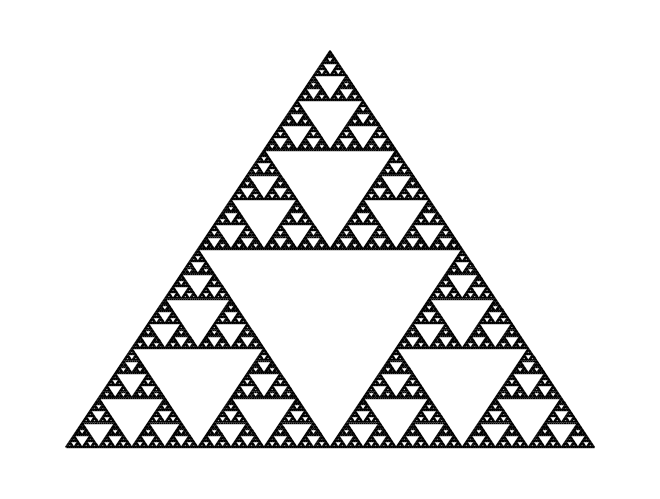

In [8]:
NODE_SIZE = 60
# SG progression
GASKET_LEVEL = 8
# for i in range(GASKET_LEVEL+1):
SG_graph = create_sierpinski_gasket_nx(n= GASKET_LEVEL)
plt.figure()
nx.draw(
    SG_graph, 
    pos=SG_graph.pos, 
    with_labels=False, 
    node_size=0.0001, 
    node_color='black',
    edge_color='black'
)
plt.savefig(f'/home/dtywick/OneDrive/Coding/FractalsREU/LaplacianEigenmaps_on_SG/images/sgProgression/sg8', dpi=300, bbox_inches='tight')
plt.show()

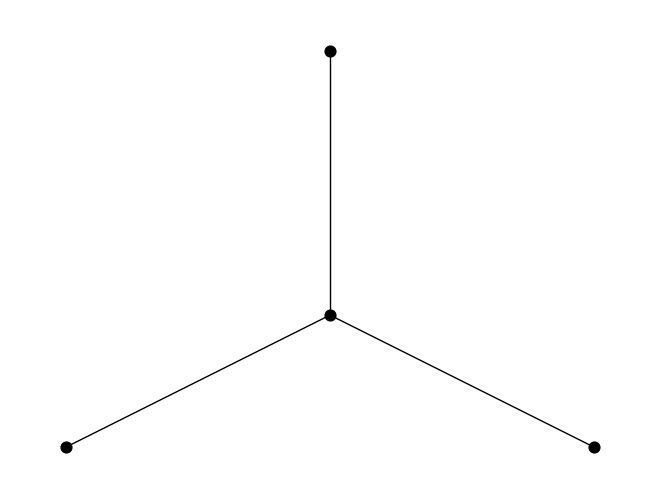

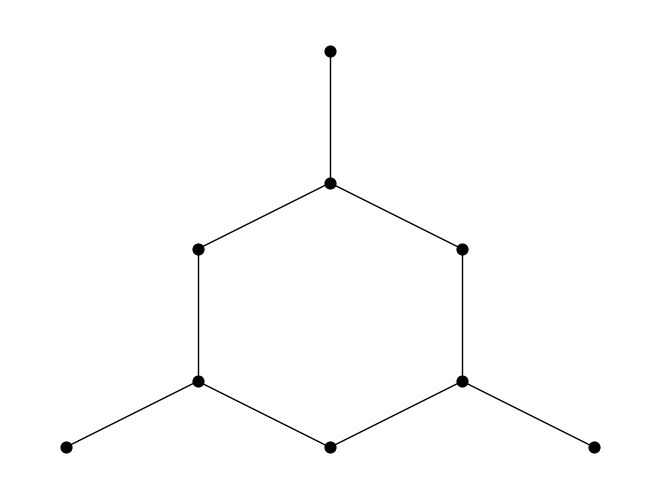

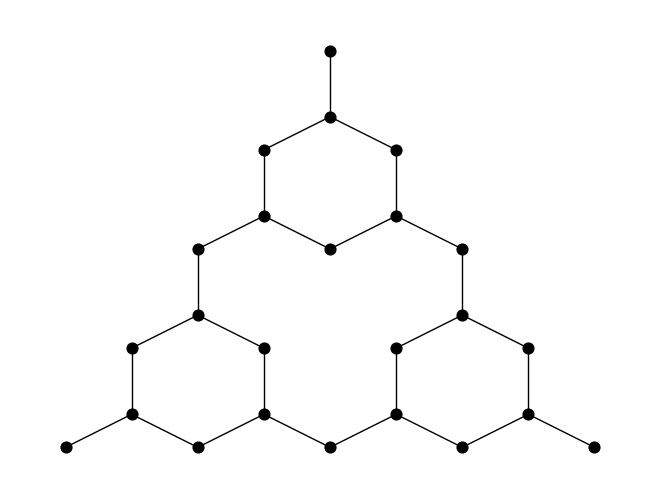

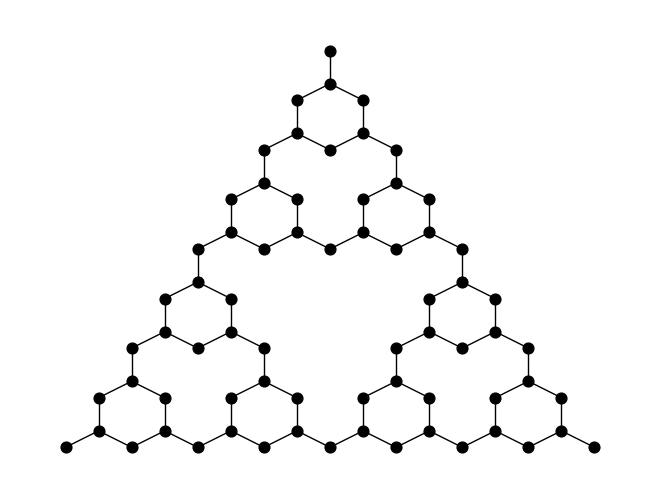

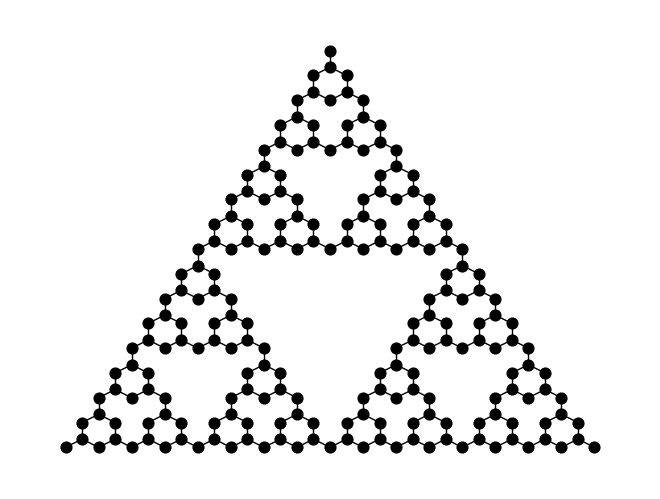

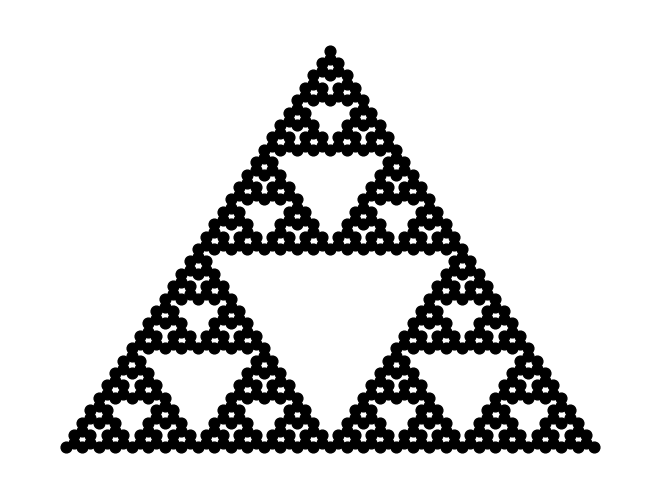

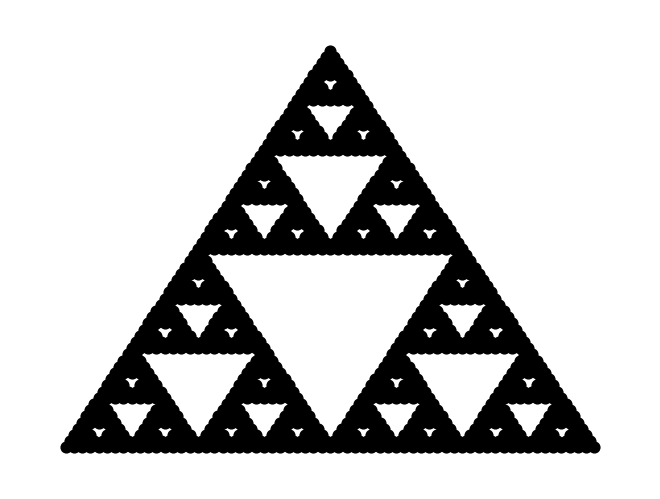

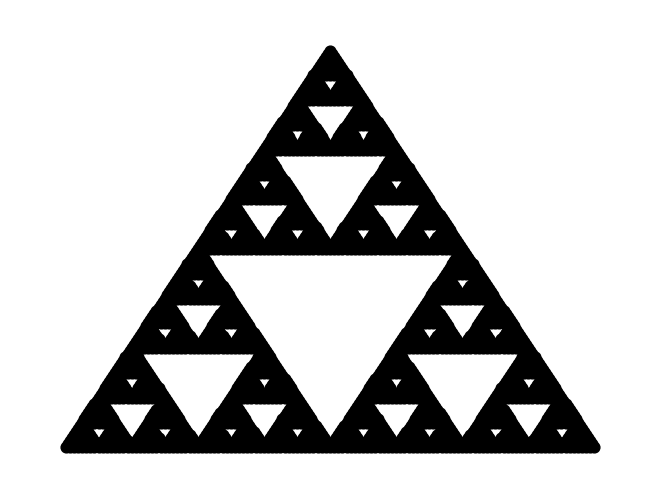

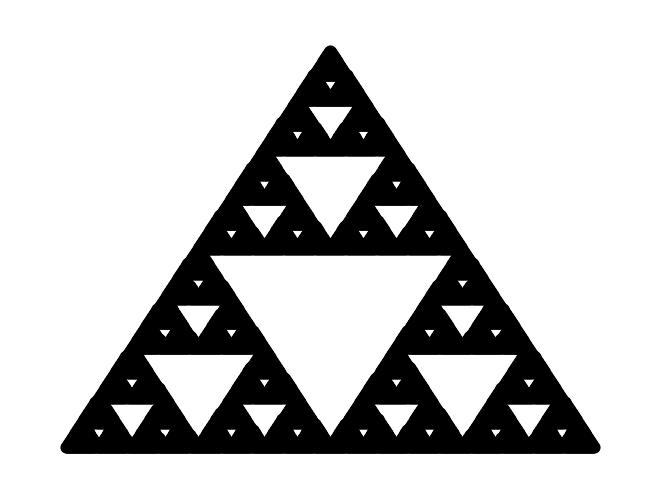

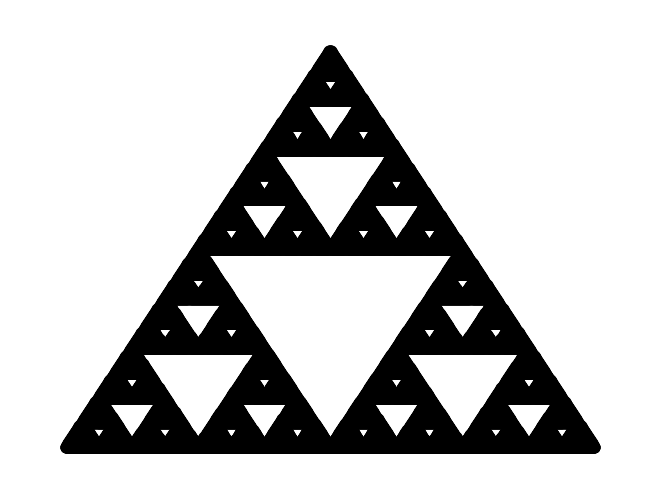

In [ ]:
# J progression
J_level = 9
for i in range(J_level+1):
    Jn = nx_create_j_graph(i)
    plt.figure()
    nx.draw(Jn, pos=Jn.pos, with_labels=False, node_size=NODE_SIZE, width=1, node_color='black')
    plt.savefig(f'/home/tywick/OneDrive/UConn/Coding/Sage_Notebooks/newplots/jProgression/J{i}.png', dpi=300, bbox_inches='tight')
    # plt.show()

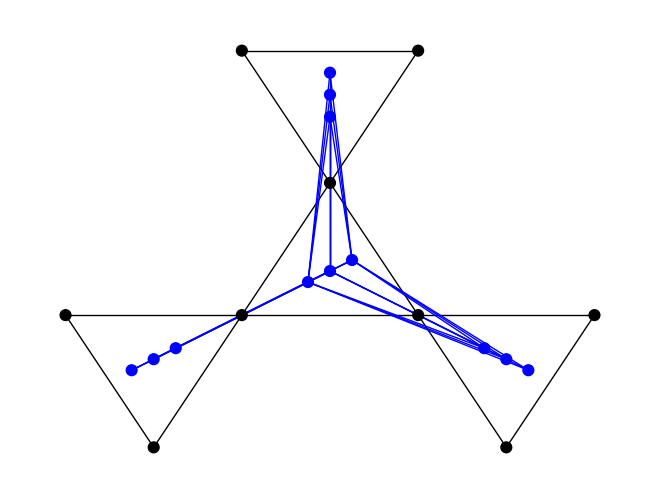

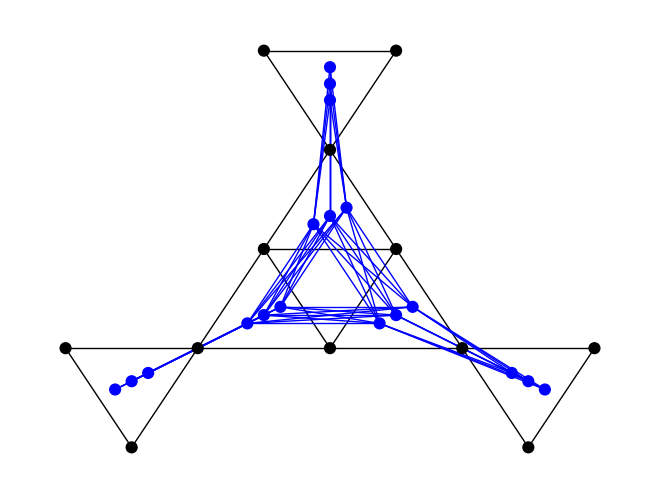

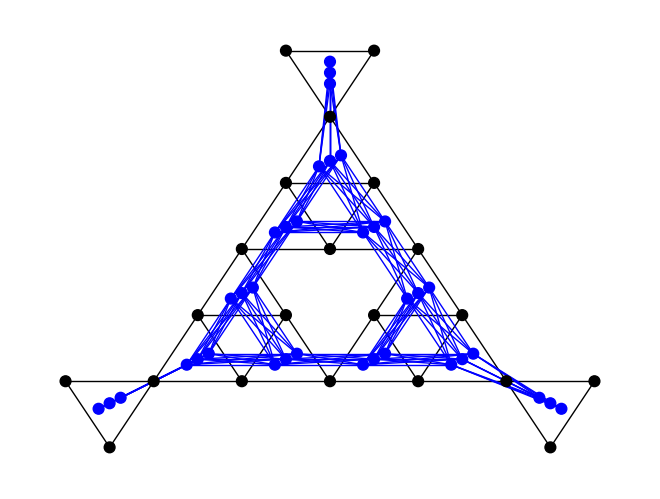

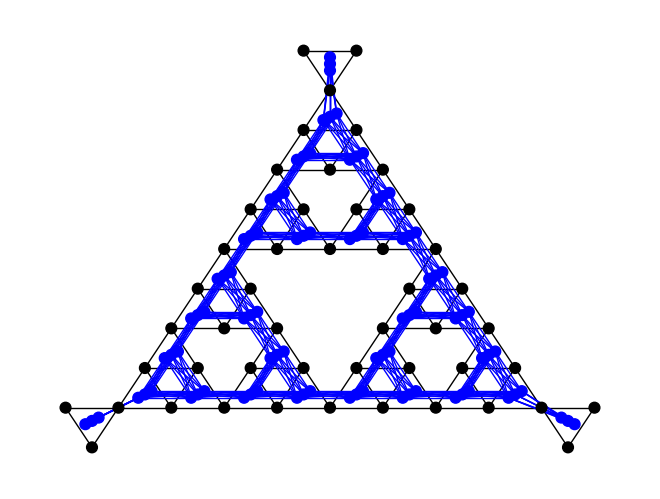

In [ ]:
# sg with points progression
SG_LEVEL = 3 
POINTS_PER_CELL = 3 
for i in range(SG_LEVEL+1):
        H_graph = nx_hanoi_from_sg(n=i, m=POINTS_PER_CELL, hanoi_color='blue', sg_color='black')

        # --- 2. Prepare for Plotting ---
        # Extract the position and color attributes from the graph object.
        pos = H_graph.pos
        # Note: .values() gives an ordered list of colors matching G.nodes() and G.edges()
        node_colors = list(nx.get_node_attributes(H_graph, 'color').values())
        edge_colors = list(nx.get_edge_attributes(H_graph, 'color').values())

        # --- 3. Plot the Graph ---
        plt.figure()
        nx.draw(H_graph, pos, 
                with_labels=False, 
                node_size=NODE_SIZE, 
                node_color=node_colors,
                edge_color=edge_colors)
        # save the graph
        plt.savefig(f'/home/tywick/OneDrive/UConn/Coding/Sage_Notebooks/newplots/sgHanoiProgression/sgH{i}.png', dpi=300, bbox_inches='tight')
        plt.show()

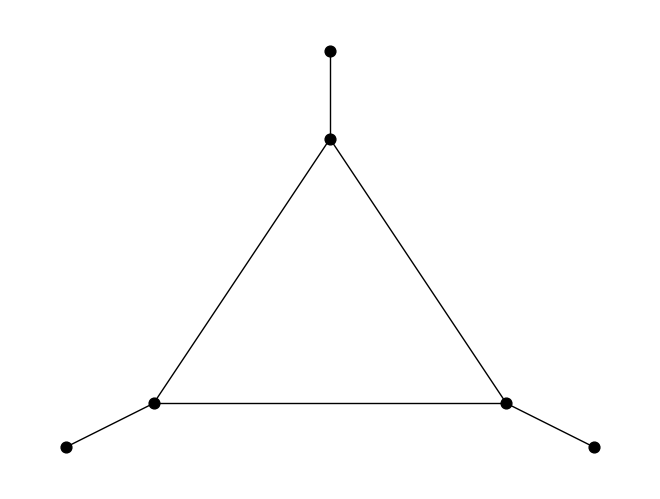

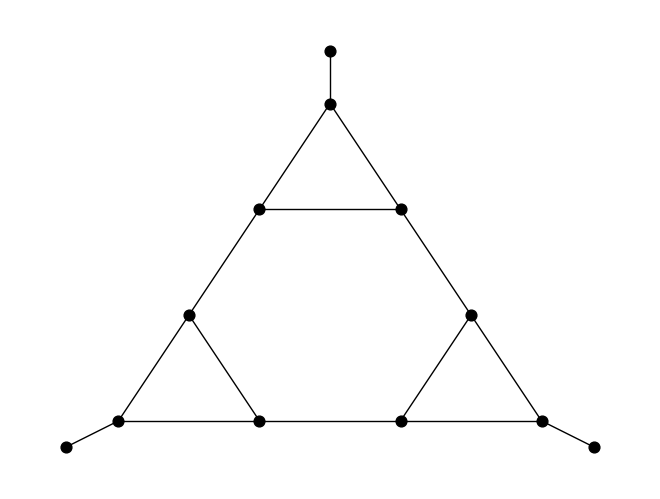

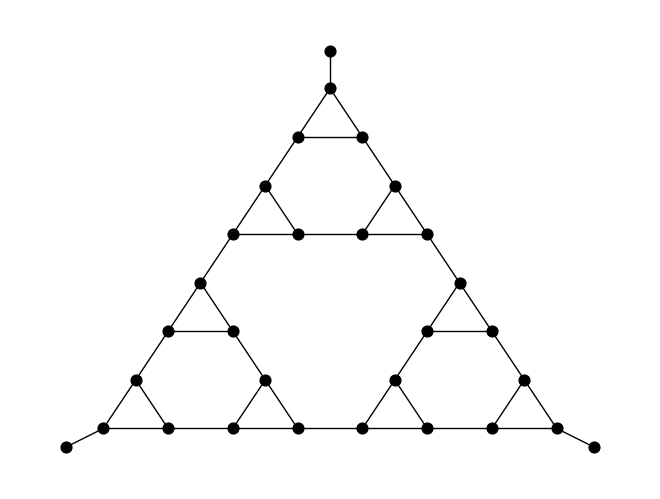

In [ ]:
# Hanoi progression
H_level = 3
for i in range(1,H_level+1):
    hn = hanoi_t(i)
    pos = get_pos(hn, tail_extension_factor=0.5)
    plt.figure()
    nx.draw(hn, pos, 
            with_labels=False, 
            node_size=NODE_SIZE, 
            node_color='black',
            edge_color='black')
    # save the graph
    plt.savefig(f'/home/tywick/OneDrive/UConn/Coding/Sage_Notebooks/newplots/hanoiProgression/h{i}.png', dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
num_nodes_seq

[6, 12, 30, 84, 246, 732, 2190, 6564]

In [ ]:
N = 6564
num_nodes_seq = [(3^(n)) + 3  for n in range(1,9)]
for i, n in enumerate(num_nodes_seq):
    if n == N:
        graphOrder = i + 1 
print(graphOrder)

8


In [ ]:
hanoi_t(8).order()

6564

## Random Graphs (Full SG and Hanoi at $n=0$)

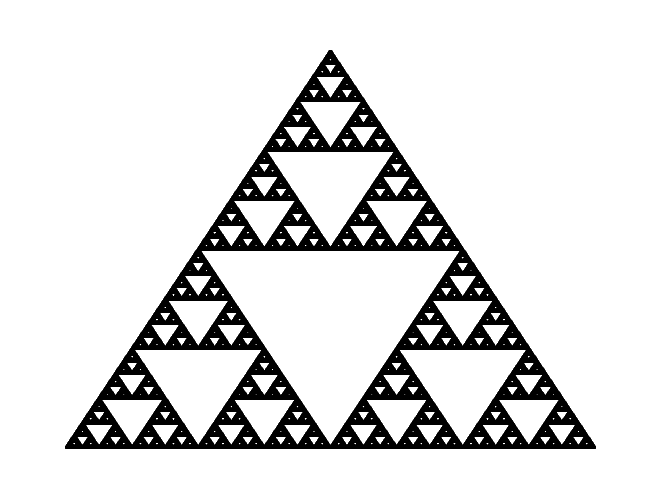

In [ ]:
# making a full plot of sg 
GASKET_LEVEL = 10
SG_graph = create_sierpinski_gasket_nx(n=GASKET_LEVEL)
plt.figure()
nx.draw(
    SG_graph, 
    pos=SG_graph.pos, 
    with_labels=False, 
    node_size=1, 
    node_color='black',
    edge_color='black'
)
plt.savefig('/home/tywick/OneDrive/UConn/Coding/Sage_Notebooks/newplots/fullSG.png', dpi=300, bbox_inches='tight')
plt.show()

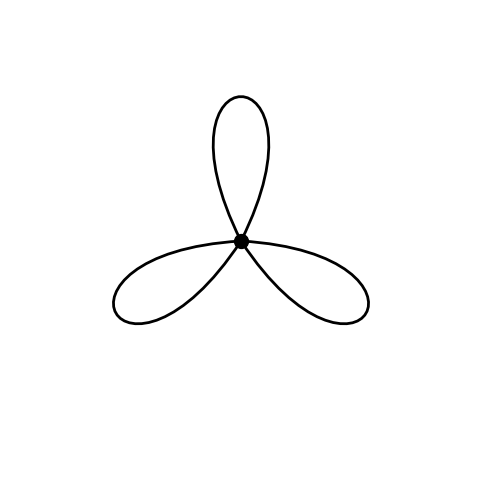

In [ ]:
# trying to make H_0 (a single vertex with three loops)
import matplotlib.patches as patches
import matplotlib.path as mpath

# --- 1. Create the Graph Structure ---
# We use a MultiGraph to allow for multiple self-loops on a single node.
G = nx.MultiGraph()
G.add_node(0)  # The central vertex

# Add three self-loops to the central vertex.
G.add_edge(0, 0)
G.add_edge(0, 0)
G.add_edge(0, 0)

# --- 2. Prepare the Plot ---
fig, ax = plt.subplots(figsize=(6, 6))

# Define the position of our single node at the center
pos = {0: (0, 0)}

# --- 3. Manually Draw the "Petal" Edges ---
# We will define the shape of one petal using a Bézier curve Path
# and then rotate it to create the other two.

# Define the vertices and control codes for a single vertical petal
Path = mpath.Path
path_data = [
    (Path.MOVETO, [0.0, 0.0]),     # Start at the center
    (Path.CURVE4, [-0.5, 1.0]),     # First control point (up and left)
    (Path.CURVE4, [0.5, 1.0]),      # Second control point (up and right)
    (Path.CURVE4, [0.0, 0.0]),     # End at the center
]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)

# Create and add the three petals by rotating the base path
for i in range(3):
    # Calculate rotation angle: 0, 120, 240 degrees
    angle = np.deg2rad(i * 120)
    rotation = np.array([[np.cos(angle), -np.sin(angle)],
                         [np.sin(angle),  np.cos(angle)]])
    
    # Apply rotation to the path's vertices
    rotated_verts = np.dot(path.vertices, rotation)
    
    # Create a patch from the rotated path
    petal = patches.PathPatch(
        mpath.Path(rotated_verts, path.codes),
        facecolor='none',  # No fill color
        edgecolor='black',
        linewidth=2
    )
    
    # Add the styled petal to the plot
    ax.add_patch(petal)

# --- 4. Draw the Central Node ---
# We draw the node on top of the petals.
nx.draw_networkx_nodes(G, pos,
                      ax=ax,
                      node_size=100,
                      node_color='black')

# --- 5. Finalize the Plot ---
# Set the plot limits to ensure the entire shape is visible
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)

# Ensure the aspect ratio is equal to prevent distortion
ax.set_aspect('equal', adjustable='box')

# Hide the axes for a clean, diagram-like appearance
ax.axis('off')

plt.savefig('/home/tywick/OneDrive/UConn/Coding/Sage_Notebooks/newplots/hanoi0Loops.png', dpi=300, bbox_inches='tight')

plt.show()

## Making Graph Reduction Sequences

Note: the graph below needs the **add_deterministic_weights** function to be updated to work properly.

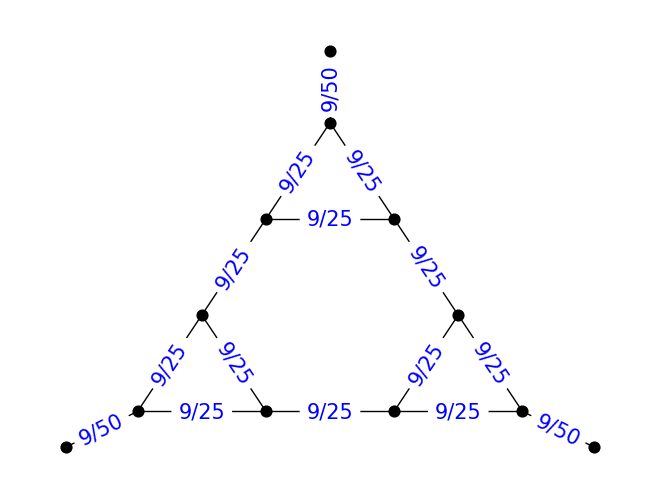

In [ ]:
NODE_SIZE = 60

n = 2; hn = hanoi_t(n)

g = add_deterministic_weights(hn, n)

edge_labels = {(u, v): 1 / d['weight'] for u, v, d in g.edges(data=True)}

pos = get_pos(g, tail_extension_factor=0.75)

plt.figure()
nx.draw(g, pos, node_color='black', node_size=NODE_SIZE)

nx.draw_networkx_edge_labels(g, pos,
                             edge_labels=edge_labels,
                             font_color='blue',
                             font_size=15)

path = '/home/tywick/OneDrive/UConn/Coding/Sage_Notebooks/newplots/reductionWithWeights/h2_reductionW0.png'
# plt.savefig(path, dpi=300, bbox_inches='tight')


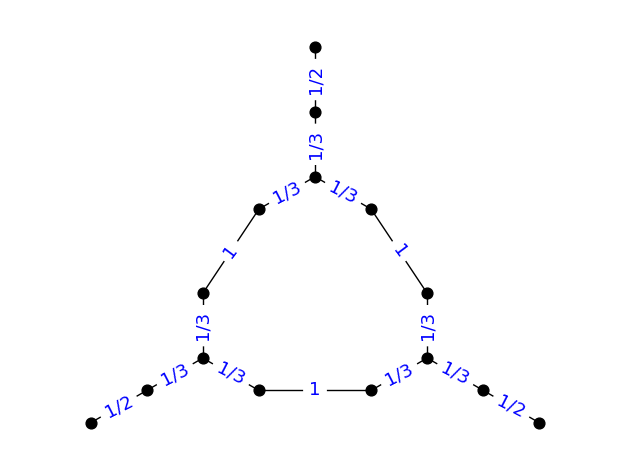

In [ ]:
def h2_reduction_graph_with_new_weights(savepath=""):
    """
    Generates and plots the h2 reduction graph with a specific fractional
    weighting scheme as requested:
    - Bridge edges: 1
    - Tail edges: 1/2
    - Y-network edges: 1/3
    """
    # Use a white background for this plot
    plt.style.use('default') 
    
    # --- 1. Build the Full "Three Y's" Graph (same as original) ---
    G = nx.Graph()
    
    node_names = []
    for i in range(3):
        node_names.append(f'y{i}_c')
        for j in range(3):
            node_names.append(f'y{i}_l{j}_i')
            node_names.append(f'y{i}_l{j}_o')
    G.add_nodes_from(node_names)
    
    pos = {}
    anchor_radius = 2.0
    y_anchors = [
        (0, anchor_radius * 0.9),
        (-anchor_radius * np.sqrt(3)/2, -anchor_radius/2),
        (anchor_radius * np.sqrt(3)/2, -anchor_radius/2)
    ]
    leg_angles = [
        [np.pi/2, 7*np.pi/6, 11*np.pi/6],
        [7*np.pi/6, 11*np.pi/6, np.pi/2],
        [11*np.pi/6, np.pi/2, 7*np.pi/6],
    ]
    leg_dist_inner, leg_dist_outer = 1.0, 2.0
    
    for i in range(3):
        anchor_x, anchor_y = y_anchors[i]
        pos[f'y{i}_c'] = (anchor_x, anchor_y)
        for j in range(3):
            angle = leg_angles[i][j]
            pos[f'y{i}_l{j}_i'] = (anchor_x + leg_dist_inner * np.cos(angle), 
                                   anchor_y + leg_dist_inner * np.sin(angle))
            pos[f'y{i}_l{j}_o'] = (anchor_x + leg_dist_outer * np.cos(angle), 
                                   anchor_y + leg_dist_outer * np.sin(angle))

    white_edges_full = []
    for i in range(3):
        for j in range(3):
            white_edges_full.append((f'y{i}_c', f'y{i}_l{j}_i'))
            white_edges_full.append((f'y{i}_l{j}_i', f'y{i}_l{j}_o'))
            
    pink_edges_full = [
        ('y0_l2_i', 'y2_l1_i'), ('y0_l1_i', 'y1_l2_i'), ('y1_l1_i', 'y2_l2_i'),
    ]
    
    G.add_edges_from(white_edges_full)
    G.add_edges_from(pink_edges_full)
    
    # --- 2. Prune the Graph (same as original) ---
    nodes_to_keep = {'y0_l0_o', 'y1_l0_o', 'y2_l0_o'}
    nodes_to_delete = [
        node for node in G.nodes() 
        if isinstance(node, str) and '_o' in node and node not in nodes_to_keep
    ]
    G.remove_nodes_from(nodes_to_delete)
    
    # --- 3. Assign NEW Weights and Create Display Labels ---
    edge_labels = {}
    for u, v in G.edges():
        # A. Check for bridge edges (weight = 1)
        if (u, v) in pink_edges_full or (v, u) in pink_edges_full:
            G.edges[u, v]['weight'] = 1
            edge_labels[(u, v)] = '1'
            continue
        
        # B. Check for tail edges (weight = 1/2)
        # These are the edges connected to the outermost nodes.
        if u in nodes_to_keep or v in nodes_to_keep:
            G.edges[u, v]['weight'] = 0.5
            edge_labels[(u, v)] = '1/2'
            continue
            
        # C. The rest are Y-network edges (weight = 1/3)
        G.edges[u, v]['weight'] = 1/3
        edge_labels[(u, v)] = '1/3'

    # --- 4. Draw the Final Graph with New Edge Weights ---
    fig, ax = plt.subplots()
    
    # Draw the edges
    nx.draw_networkx_edges(G, pos, ax=ax, edge_color='black', width=1)
    
    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, ax=ax, node_color='black', node_size=NODE_SIZE)
    
    # Draw the new edge weight labels using the custom dictionary
    nx.draw_networkx_edge_labels(
        G, 
        pos, 
        edge_labels=edge_labels, 
        font_color='blue', 
        font_size=13,
        # Add a faint white background to labels for better readability
    )
    
    ax.axis('equal')
    ax.axis('off')
    plt.tight_layout()

    if savepath:    
        plt.savefig(savepath, dpi=300, bbox_inches='tight')

    plt.show()

path = '/home/tywick/OneDrive/UConn/Coding/Sage_Notebooks/newplots/reductionWithWeights/h2_reductionW1.png'
# path = ''
h2_reduction_graph_with_new_weights(path)

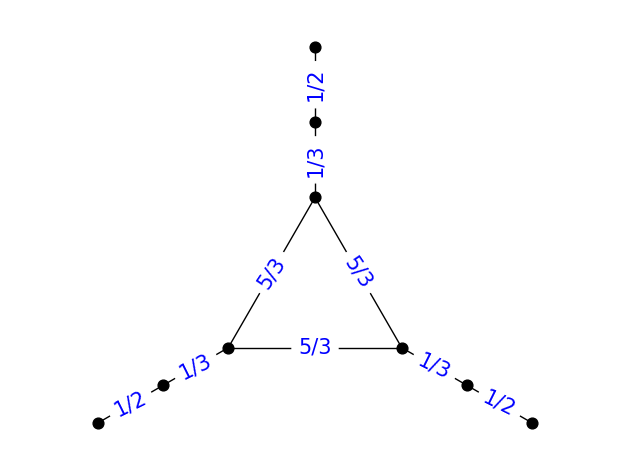

In [ ]:
def get_pos2(G, tail_extension_factor=0.3):
    """
    Calculates positions for the hanoi_t(1) graph with extra tails.
    This version is corrected to handle tuple-based node names properly.
    """
    pos = {}
    # Correctly define anchors with the TUPLE node names as keys
    anchors = {
        (0,): (0, 1.0),
        (1,): (-np.sqrt(3) / 2, -0.5),
        (2,): (np.sqrt(3) / 2, -0.5)
    }

    for node in G.nodes():
        # Case 1: The node is one of the central triangle vertices
        if node in anchors:
            pos[node] = anchors[node]
            continue

        # Case 2 & 3: The node is a tail node. This handles both 'tail_' and 'extra_tail_'.
        if isinstance(node, str) and 'tail_' in node:
            if 'extra_tail_' in node:
                # Outermost tail node, e.g., 'extra_tail_0'
                index = int(node.split('_')[2])
                extension = 1 + 2 * tail_extension_factor
            else:
                # Inner tail node, e.g., 'tail_0'
                index = int(node.split('_')[1])
                extension = 1 + tail_extension_factor
            
            # Get the corresponding anchor position
            anchor_pos = anchors[(index,)]
            
            # Position the tail node along the line from the origin
            pos[node] = (anchor_pos[0] * extension, anchor_pos[1] * extension)
            
    return pos

def hanoi_t2(n: int):
    """
    Generates the Hanoi graph with tails.
    """
    elements, G = {0, 1, 2}, nx.Graph()
    vertices = list(itertools.product(elements, repeat=n))
    G.add_nodes_from(vertices)

    m = n
    bridge_edges = [list(itertools.product(elements, repeat=M)) for M in range(1, m + 1)]
    for edge_list in bridge_edges:
        for I_m in edge_list:
            m_len = len(I_m)
            prefix = I_m[:-1] if len(I_m) > 1 else ()
            i = I_m[-1]
            j, k = [e for e in elements if e != i]
            suffix_len = n - len(prefix)
            if suffix_len > 0:
                v1 = prefix + tuple([j] + [k] * (suffix_len - 1))
                v2 = prefix + tuple([k] + [j] * (suffix_len - 1))
                G.add_edge(v1, v2)

    boundary_nodes = {i: (i,) * n for i in range(3)}
    for i, b_node in boundary_nodes.items():
        tail_node = f'tail_{i}'
        G.add_edge(b_node, tail_node)
    return G

# --- 1. Generate the base graph ---
n = 1
hn = hanoi_t2(n)

# --- 2. Extend each degree-1 node to create the final structure ---
tail_counter = 0
for node in list(hn.nodes):
    if hn.degree[node] == 1:
        new_tail_node = f"extra_tail_{tail_counter}"
        hn.add_node(new_tail_node)
        hn.add_edge(node, new_tail_node)
        tail_counter += 1

# --- 3. Assign weights and create labels based on edge type ---
edge_labels = {}
for u, v in hn.edges():
    if 'extra_tail' in str(u) or 'extra_tail' in str(v):
        hn.edges[u, v]['weight'] = 1/2
        edge_labels[(u, v)] = '1/2'
    elif 'tail' in str(u) or 'tail' in str(v):
        hn.edges[u, v]['weight'] = 1/3
        edge_labels[(u, v)] = '1/3'
    else:
        hn.edges[u, v]['weight'] = 5/3
        edge_labels[(u, v)] = '5/3'

# --- 4. Plot the graph with weights ---
plt.figure()
ax = plt.gca()

# Calculate positions using the corrected function
pos = get_pos2(hn, tail_extension_factor=0.75)

# Draw the graph
nx.draw_networkx_nodes(hn, pos, node_color='black', node_size=NODE_SIZE, ax=ax)
nx.draw_networkx_edges(hn, pos, edge_color='black', width=1, ax=ax)

# Draw the edge weight labels
nx.draw_networkx_edge_labels(
    hn,
    pos,
    edge_labels=edge_labels,
    font_color='blue',
    font_size=15)

ax.axis('equal')
ax.axis('off')
plt.tight_layout()

# path = '/home/tywick/OneDrive/UConn/Coding/Sage_Notebooks/newplots/reductionWithWeights/h2_reductionW2.png'
# plt.savefig(path, dpi=300, bbox_inches='tight')

plt.show()

Note, the cell below needs the function **add_deterministic_weights** to be updated before saving to get the correct weights

{((0,), (2,)): Text(0.625000000000000, 0.3608439182435161, '3/5'),
 ((0,), (1,)): Text(0.375000000000000, 0.3608439182435161, '3/5'),
 ((0,), 'tail_0'): Text(0.500000000000000, 0.6856034446626805, '3/10'),
 ((1,), (2,)): Text(0.500000000000000, 0.14433756729740643, '3/5'),
 ((1,), 'tail_1'): Text(0.156250000000000, 0.09021097956087902, '3/10'),
 ((2,), 'tail_2'): Text(0.843750000000000, 0.09021097956087902, '3/10')}

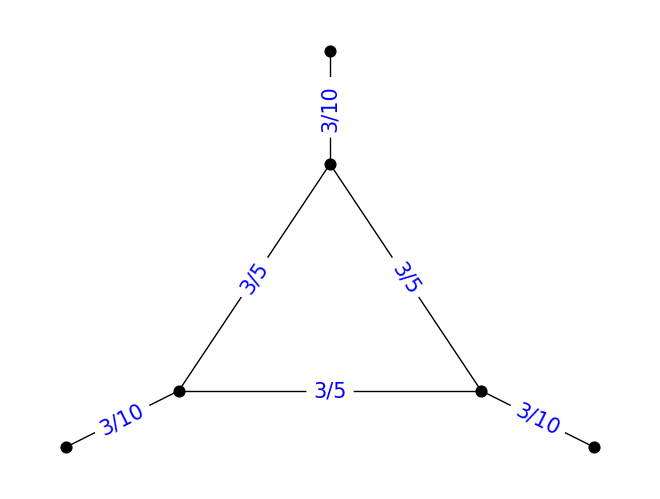

In [ ]:
n = 1; hn = hanoi_t(n)
g = add_deterministic_weights(hn, n)

edge_labels = {(u, v): 1/d['weight'] for u, v, d in hn.edges(data=True)}

pos = get_pos(g, tail_extension_factor=.75)

plt.figure()
nx.draw(g, pos, node_color='black', node_size=NODE_SIZE)
nx.draw_networkx_edge_labels(
    g,
    pos,
    edge_labels=edge_labels,
    font_color='blue',
    font_size=15)
# path = '/home/tywick/OneDrive/UConn/Coding/Sage_Notebooks/newplots/reductionWithWeights/h2_reductionW3.png'
# plt.savefig(path, dpi=300, bbox_inches='tight')


# Creating an Image Describing $\varphi_n^j$, $\varphi_n$, and $\Phi_n$.